In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/lab_6/sign_mnist_train.csv')
test = pd.read_csv('../data/lab_6/sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
train.shape

(27455, 785)

In [4]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

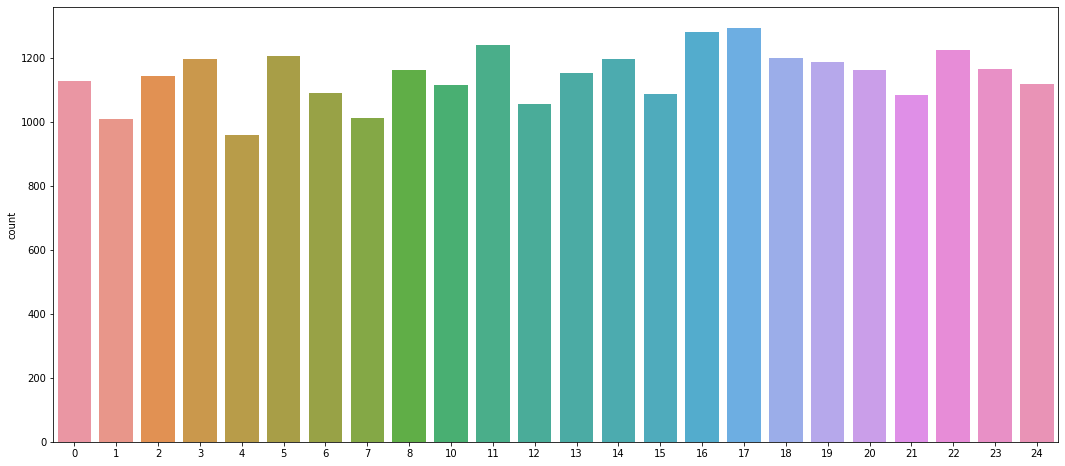

In [5]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [6]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [7]:
train.drop('label', axis = 1, inplace = True)

In [8]:
images = train.values
images =  images/255

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 7)

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
x_train.shape, x_test.shape

((19218, 28, 28, 1), (8237, 28, 28, 1))

In [24]:
import keras
from keras.models import Sequential, Model
from keras.layers import GlobalMaxPooling2D, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [14]:
num_classes = 24
batch_size = 125
epochs = 50

In [15]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (4, 4), activation = 'relu', padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='nadam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)        

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    shear_range = 0.25,
    zoom_range = 0.15,
    rotation_range = 15,
    brightness_range = [0.15, 1.15],
    width_shift_range = [-2,-1, 0, +1, +2],
    height_shift_range = [ -1, 0, +1],
    fill_mode = 'reflect'
)

test_datagen = ImageDataGenerator()

In [17]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)


Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 13s 698us/step - loss: 2.0454 - accuracy: 0.3663 - val_loss: 1.2921 - val_accuracy: 0.7773
Epoch 2/50
19218/19218 [==============================] - 13s 683us/step - loss: 0.5098 - accuracy: 0.8268 - val_loss: 0.6050 - val_accuracy: 0.9604
Epoch 3/50
19218/19218 [==============================] - 13s 688us/step - loss: 0.2245 - accuracy: 0.9231 - val_loss: 0.3113 - val_accuracy: 0.9920
Epoch 4/50
19218/19218 [==============================] - 13s 681us/step - loss: 0.1149 - accuracy: 0.9615 - val_loss: 0.1726 - val_accuracy: 0.9978
Epoch 5/50
19218/19218 [==============================] - 13s 685us/step - loss: 0.0802 - accuracy: 0.9727 - val_loss: 0.1287 - val_accuracy: 0.9992
Epoch 6/50
19218/19218 [==============================] - 13s 684us/step - loss: 0.0607 - accuracy: 0.9788 - val_loss: 0.0743 - val_accuracy: 0.9994
Epoch 7/50
19218/19218 [==============================] 

KeyboardInterrupt: 

In [26]:
from keras.applications import VGG16
from keras import optimizers

In [31]:
pre_trained_model = VGG16(input_shape=(28,28,3), include_top=False, weights="imagenet")

ValueError: Input size must be at least 32x32; got `input_shape=(28, 28, 3)`

In [27]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    

x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________

In [28]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

ValueError: Error when checking input: expected input_1 to have shape (224, 224, 3) but got array with shape (28, 28, 1)